In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
class Graph:
    def __init__(self, V):
        self.V = V
        self.nxg = nx.Graph()
        self.G = {}
        for i in range(V):
            self.nxg.add_node(i)
            self.G[i] = []
        
    def addEdge(self, u, v, undirected = True):
        self.nxg.add_edge(u, v)
        self.G[u].append(v)
        if undirected:        
            self.G[v].append(u)

In [2]:
class checkEuler:
    def __init__(self, G):
        self.V = G.V
        self.G = G.G
    
    def dfs(self, v):
        self.visit[v] = True
        for nb in self.G[v]:
            if self.visit[nb] == False:
                self.dfs(nb)
    
    def connected(self):
        self.visit = [False] * self.V
        for i in range(self.V):
            if len(self.G[i]) > 0:
                break
        if i == self.V - 1:
            return True
        self.dfs(i)
        for i in range(self.V):
            if len(self.G[i]) > 0 and self.visit[i] == False:
                return False
        return True
    
    def check(self):
        if self.connected():
            odd_degree_count = 0
            for i in range(self.V):
                odd_degree_count += (len(self.G[i]) % 2 == 1)
                if odd_degree_count == 0:
                    return "Euler Circuit"
                if odd_degree_count == 2:
                    return "Euler Tour"
                if odd_degree_count > 2:
                    return "No Euler"

In [3]:
class checkDirectedEuler:
    def __init__(self, G):
        self.V = G.V
        self.G = G.G
        
    def dfs(self, u, tempG):
        self.visit[u] = True
        for i in tempG[u]:
            if self.visit[i] == False:
                self.dfs(i, tempG)
        
    def transpose(self):
        newg = Graph(self.V)
        for v in range(self.V):
            for nb in self.G[v]:
                newg.addEdge(nb, v, undirected = False)
        return newg
        
        
    def check(self):
        for i in range(self.V):
            if len(self.G[i]):
                break
                
        self.visit = [False] * self.V
        self.dfs(i, self.G)
        if self.visit.count(False) > 0:            return False
        
        newg = self.transpose()
        self.visit = [False] * self.V
        self.dfs(i, newg.G)
        if self.visit.count(False) > 0:            
            return False
        
        self.i = [0] * self.V
        for node in self.G:
            for nbor in self.G[node]:
                self.i[nbor] += 1
        for i in range(self.V):
            if len(self.G[i]) != self.i[i]:
                return False
        return True   

In [10]:
class getEuler:
    def __init__(self, G):
        self.G = G.G
        self.V = G.V
    
    def dfs(self, u):
        print(u)
        while self.G[u]:
            curr = self.G[u].pop(0)
            self.G[curr].remove(u)
            self.dfs(curr)
        self.path.append(u)
        
    def eulerPath(self):
        oddcount = 0
        start = 0
        for i in range(self.V):
            print(i, self.G[i])
            if len(self.G[i]) % 2 != 0:
                oddcount +=1
                start = i
        if oddcount > 2: return False
        
        self.path = []
        self.dfs(start)
        return self.path

Euler Tour


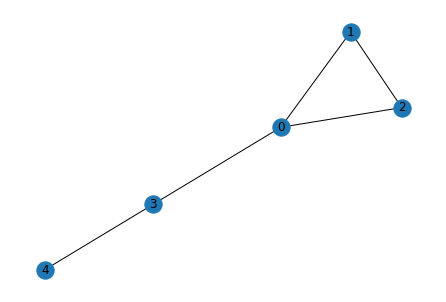

In [5]:
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)

et1 = checkEuler(g1)
print( et1.check() )
nx.draw(g1.nxg, with_labels=True)

Euler Circuit
0 [1, 2, 3, 4]
1 [0, 2]
2 [0, 1]
3 [0, 4]
4 [3, 0]
0
1
2
0
3
4
0
[0, 4, 3, 0, 2, 1, 0]


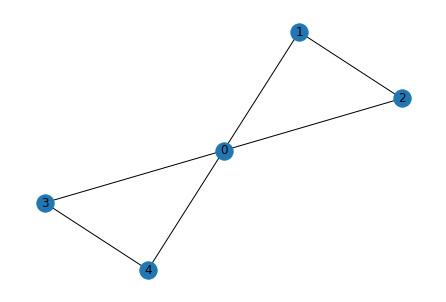

In [14]:
g2 = Graph(5)
g2.addEdge(1, 0)
g2.addEdge(0, 2)
g2.addEdge(2, 1)
g2.addEdge(0, 3)
g2.addEdge(3, 4)
g2.addEdge(4, 0)

et2 = checkEuler(g2)
print( et2.check() )
nx.draw(g2.nxg, with_labels=True)

ep = getEuler(g2)
print(ep.eulerPath())

True
{0: [2, 3], 1: [0], 2: [1], 3: [4], 4: [0]}
0 [2, 3]
1 [0]
2 [1]
3 [4]
4 [0]
False


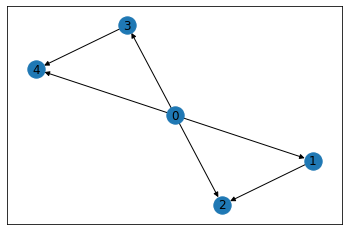

In [13]:
g = Graph(5);
g.addEdge(1, 0, undirected=False);
g.addEdge(0, 2, undirected=False);
g.addEdge(2, 1, undirected=False);
g.addEdge(0, 3, undirected=False);
g.addEdge(3, 4, undirected=False);
g.addEdge(4, 0, undirected=False);
et = checkDirectedEuler(g)
print(et.check())
nx.draw_networkx(g.nxg, arrows=True, with_labels=True)


print(g.G)

ep = getEuler(g)
print(ep.eulerPath())